### Notas de aula de Mecânica Quântica <br> Autor: Jonas Maziero

# Estrutura fina do átomo de hidrogênio

## Átomo de hidrogênio: Caso não "perturbado"
Aqui usaremos correções perturbativas de 1ª ordem para obter a estrutura fina dos níveis de energia do átomo de hidrogênio. O mesmo procedimento se aplica a átomos hidrogenóides, e os resultados se aplicam qualitativamente a qualquer sistema atômico.

Lembrando, com o referencial no centro de massa, quando consideramos somente a interação Coulombiana, o Hamiltoniano do átomo de Hidrogênio tem a forma
\begin{equation}
H_{0} = \frac{P^{2}}{2m}+U = -\frac{\hbar^{2}}{2m}\nabla^{2} - \frac{ke^{2}}{r},
\end{equation}
onde a massa reduzida é
\begin{equation}
m=\frac{m_{e}m_{p}}{m_{e}+m_{p}},
\end{equation}
com $m_{e}\ (m_{p})$ sendo a massa do elétron (próton). 
Da solução exata para a equação de Schrödinger nesse caso (https://nbviewer.jupyter.org/github/jonasmaziero/mecanica_quantica_1900-1925/blob/master/16_hidrogenio.ipynb), temos as energias
\begin{align}
E_{n}^{(0)} &= -\frac{m k^{2}e^{4}}{2\hbar^{2}}\frac{1}{n^{2}} = -\left(\frac{ke^{2}}{\hbar c}\right)^{2}\frac{mc^{2}}{2n^{2}} = -\frac{\alpha^{2}mc^{2}}{2n^{2}},
\end{align}
com $n=1,2,3,\cdots$ e a constante de estrutura fina sendo
\begin{equation}
\alpha := \frac{ke^{2}}{\hbar c} \approx \frac{1}{137,04}.
\end{equation}
Na sequência, também utilizaremos o raio de Bohr:
\begin{equation}
a := \frac{\hbar^{2}}{kme^{2}} \approx 0,53\text{ }\mathring{A}.
\end{equation}

### Ordem de grandeza das autoenergias não perturbadas de H
Vale notar que a ordem de grandeza dessas energias é ditada principalmente por
\begin{equation}
\alpha^{2}mc^{2}\approx 27,2\text{ eV}.
\end{equation}

In [1]:
%run init.ipynb
m = (me*mp)/(me+mp); a0 = hb**2/(k*m*e**2); m, al**2*m*c**2/e, a0

In [2]:
def bohrH(m,n): # em eV
    return (-(al**2*m*c**2)/(2*n**2))/e
bohrH(m,1)

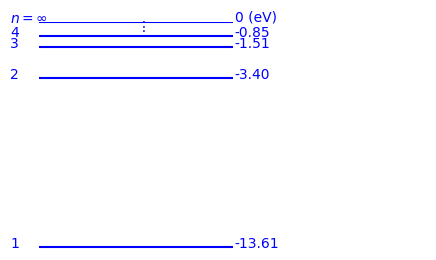

In [4]:
import matplotlib
def bohr(Z,mu,n): # em eV
    return (-((mu*Z**2*e**4*k**2)/(2*hb**2))/n**2)/e
def bohr_ed(Z,mu,xmin,xmax):
    matplotlib.rcParams.update({'font.size':10}); 
    plt.figure(figsize = (5,3), dpi = 100)
    plt.hlines(bohr(Z,mu,1),xmin,xmax,color='blue')
    plt.text(-0.15,bohr(Z,mu,1),'1',color='blue'); 
    plt.text(1.01,bohr(Z,mu,1),'%3.2f' % (bohr(Z,mu,1)),color='blue')
    plt.hlines(bohr(Z,mu,2),xmin,xmax,color='blue')
    plt.text(-0.15,bohr(Z,mu,2),'2',color='blue'); 
    plt.text(1.01,bohr(Z,mu,2),'%3.2f' % (bohr(Z,mu,2)),color='blue')
    plt.hlines(bohr(Z,mu,3),xmin,xmax,color='blue') 
    plt.text(-0.15,bohr(Z,mu,3),'3',color='blue'); 
    plt.text(1.01,bohr(Z,mu,3),'%3.2f' % (bohr(Z,mu,3)),color='blue')
    plt.hlines(bohr(Z,mu,4),xmin,xmax,color='blue')
    plt.text(-0.15,bohr(Z,mu,4),'4',color='blue'); 
    plt.text(1.01,bohr(Z,mu,4),'%3.2f' % (bohr(Z,mu,4)),color='blue')
    plt.text(0.5,-0.5,r'$\vdots$',color='blue'); 
    plt.hlines(0,0,1,color='blue')
    plt.text(-0.15,0,r'$n=\infty$',color='blue'); 
    plt.text(1.01,0.1,r'0 (eV)',color='blue')
    plt.xlim(0,2); plt.ylim(bohr(Z,mu,1)-0.1,0)
    plt.axis('off'); plt.show()
Z=1; mu = me; bohr_ed(Z,mu,0,1)

## Correção relativística
A energia cinética relativística é dada pela doferença entre a energia total e a energia de repouso:
\begin{align}
E_{c} &= E-E_{0}= \sqrt{P^{2}c^{2}+m^{2}c^{4}}-mc^{2} \\
&= mc^{2}\left(\sqrt{P^{2}/m^{2}c^{2}+1} - 1\right),
\end{align}
com $m=m_{e}m_{p}/(m_{e}+m_{p})$ sendo a massa reduzida. Seguindo, usamos a série 
\begin{equation}
\sqrt{1+x}=1+x/2-x^{2}/8+\cdots \text{, para } |x|<1,
\end{equation}
para escrever
\begin{align}
E_{c} &= mc^{2}\left(1 + \frac{P^{2}}{2m^{2}c^{2}} - \frac{P^{4}}{8m^{4}c^{4}} + \cdots - 1\right) \approx \frac{P^{2}}{2m} - \frac{P^{4}}{8m^{3}c^{2}}.
\end{align}
Então, escrevendo o Hamiltoniano total, nesta aproximação, como 
\begin{equation}
H=H_{0}+H_{1}^{r},
\end{equation}
a correção relativística será calculada usando o _Hamiltoniano de perturbação_:
\begin{equation}
H_{1}^{r}=-\frac{P^{4}}{8m^{3}c^{2}}.
\end{equation}

In [5]:
m = (me*mp)/(me+mp); m, m*c**2/e, me*(10**6)**2/e

### Correção perturbativa de 1ª ordem
\begin{equation}
E_{n}^{r(1)} = \langle\psi_{n,l,m_{l}}^{(0)}|H_{1}^{r}|\psi_{n,l,m_{l}}^{(0)}\rangle = -\frac{1}{8m^{3}c^{2}}\langle\psi_{n,l,m_{l}}^{(0)}|P^{4}|\psi_{n,l,m_{l}}^{(0)}\rangle.
\end{equation}
O termo $P^{4}$ pode ser reescrito como segue
\begin{align}
P^{4} & = P^{2}P^{2} = 2m(H_{0}-U)2m(H_{0}-U) \\
      & = 4m^{2}\left(H_{0}^{2} - UH_{0} - H_{0}U + U^{2}\right).
\end{align}
Assim
\begin{align}
E_{n}^{r(1)} & = -\frac{1}{2mc^{2}}\left(\langle \psi_{n,l,m_{l}}^{(0)}|H_{0}^{2}|\psi_{n,l,m_{l}}^{(0)}\rangle - \langle\psi_{n,l,m_{l}}^{(0)}|UH_{0}|\psi_{n,l,m_{l}}^{(0)}\rangle - \langle\psi_{n,l,m_{l}}^{(0)}|H_{0}U|\psi_{n,l,m_{l}}^{(0)}\rangle + \langle\psi_{n,l,m_{l}}^{(0)}|U^{2}|\psi_{n,l,m_{l}}^{(0)}\rangle \right) \\
& = -\frac{1}{2mc^{2}}\left((E_{n}^{(0)})^{2} -2E_{n}^{(0)}\langle\psi_{n,l,m_{l}}^{(0)}|U|\psi_{n,l,m_{l}}^{(0)}\rangle + \langle\psi_{n,l,m_{l}}^{(0)}|U^{2}|\psi_{n,l,m_{l}}^{(0)}\rangle \right) \\
& = -\frac{1}{2mc^{2}}\left((E_{n}^{(0)})^{2} +2E_{n}^{(0)}\frac{e^{2}}{4\pi\epsilon_{0}}\langle\psi_{n,l,m_{l}}^{(0)}|r^{-1}|\psi_{n,l,m_{l}}^{(0)}\rangle + \left(-\frac{e^{2}}{4\pi\epsilon_{0}}\right)^{2}\langle\psi_{n,l,m_{l}}^{(0)}|r^{-2}|\psi_{n,l,m_{l}}^{(0)}\rangle \right).
\end{align}

Usando o teorema de Pauli (https://github.com/jonasmaziero/mecanica_quantica_1900-1925/blob/master/19_pauli_thm.ipynb), temos que
\begin{align}
& \langle\psi_{n,l,m_{l}}^{(0)}|r^{-1}|\psi_{n,l,m_{l}}^{(0)}\rangle=\frac{1}{an^{2}}, \\
& \langle\psi_{n,l,m_{l}}^{(0)}|r^{-2}|\psi_{n,l,m_{l}}^{(0)}\rangle = \frac{1}{a^{2}n^{3}(l+1/2)}.
\end{align}
Assim
\begin{align}
E_{n}^{r(1)} & = -\frac{1}{2mc^{2}}\left((E_{n}^{(0)})^{2} + 2E_{n}^{(0)}\frac{e^{2}}{4\pi\epsilon_{0}}\frac{1}{an^{2}} + \left(\frac{e^{2}}{4\pi\epsilon_{0}}\right)^{2}\frac{1}{a^{2}n^{3}(l+1/2)} \right) \\
& = -\frac{1}{2mc^{2}}\left((E_{n}^{(0)})^{2} + 2E_{n}^{(0)}\frac{e^{2}}{4\pi\epsilon_{0}}\frac{me^{2}}{4\pi\epsilon_{0}\hbar^{2}}\frac{1}{n^{2}} + \left(\frac{e^{2}}{4\pi\epsilon_{0}}\right)^{2}\frac{m^{2}e^{4}}{(4\pi\epsilon_{0}\hbar^{2})^{2}}\frac{1}{n^{3}(l+1/2)} \right) \\
& = -\frac{1}{2mc^{2}}\left((E_{n}^{(0)})^{2} - 4(E_{n}^{(0)})^{2} + (E_{n}^{(0)})^{2}\frac{4n}{l+1/2} \right) \\
& = -\frac{1}{2mc^{2}}(E_{n}^{(0)})^{2}\left(1 - 4 + \frac{4n}{l+1/2} \right) = -\frac{(E_{n}^{(0)})^{2}}{2mc^{2}}\left(\frac{4n}{l+1/2} -3 \right) \\
& = -\alpha^{4}mc^{2}\frac{1}{8n^{4}}\left(\frac{4n}{l+1/2} -3 \right).
\end{align}
Para obter a última igualdade, usamos 
\begin{equation}
\frac{(E_{n}^{(0)})^{2}}{mc^{2}}=\frac{\alpha^{4}mc^{2}}{4n^{4}}.
\end{equation}
Note que essa correção quebra a degenerescência da energia em $l$.

### Ordem de magnitude da correção relativística: 
O fator principal para determinação da magnitude da estrutura fina de H é 
\begin{equation}
\alpha^{4}mc^{2}\approx 1,45\mathrm{x}10^{-3}\text{ eV}.
\end{equation}
Consideremos como exemplo o caso $n=1$ e $l=0$, para o qual
\begin{equation}
E_{1}^{r(1)} = -\alpha^{4}mc^{2}(5/8) \approx -9,05\mathrm{x}10^{-4}\text{ eV}. 
\end{equation}
Note, dos resultados mostrados abaixo e da expressão geral, que esse valor tipicamente diminui em magnitude com o aumento de $n$.

In [6]:
al**4*m*c**2/e, (al**4*m*c**2/e)*(5/8)

In [7]:
def Erel(n,l): # em eV
    return -(al**4*m*c**2/e)*(1/(8*n**4))*((4*n)/(l+1/2)-3)

In [8]:
s=1/2
for n in range(1,5):
    for l in range(0,n):
        print('n=',n,', l=',l,', Erel=',Erel(n,l),'eV')

n= 1 , l= 0 , Erel= -0.0009051594240188222 eV
n= 2 , l= 0 , Erel= -0.0001470884064030586 eV
n= 2 , l= 1 , Erel= -2.6400483200548978e-05 eV
n= 3 , l= 0 , Erel= -4.6934192356531516e-05 eV
n= 3 , l= 1 , Erel= -1.1174807703936075e-05 eV
n= 3 , l= 2 , Erel= -4.0229307734169865e-06 eV
n= 4 , l= 0 , Erel= -2.0507518200426443e-05 eV
n= 4 , l= 1 , Erel= -5.421527800112737e-06 eV
n= 4 , l= 2 , Erel= -2.4043297200499968e-06 eV
n= 4 , l= 3 , Erel= -1.111244828594536e-06 eV


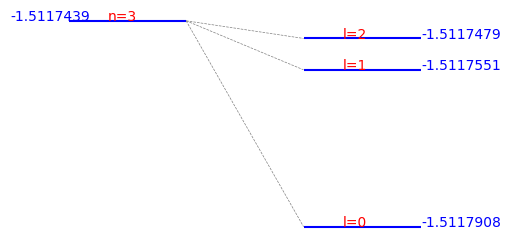

In [16]:
matplotlib.rcParams.update({'font.size':10}); 
plt.figure(figsize = (5,3), dpi = 100)
def plot_Hrel(n):
    plt.hlines(bohr(Z,mu,n), 0, 0.3, color='blue')
    plt.text(-0.15,bohr(Z,mu,n),'%10.7f' % (bohr(Z,mu,n)),color='blue')
    plt.text(0.1, bohr(Z,mu,n), 'n='+str(n), color='red')
    for l in range(0, n):
        plt.plot([0.3,0.6],[bohr(Z,mu,n),bohr(Z,mu,n)+Erel(n,l)], '--', color='gray', linewidth=0.5)
        plt.hlines(bohr(Z,mu,n)+Erel(n,l), 0.6, 0.9, color='blue')
        plt.text(0.9,bohr(Z,mu,n)+Erel(n,l),'%10.7f' % (bohr(Z,mu,n)+Erel(n,l)),color='blue')
        plt.text(0.7,bohr(Z,mu,n)+Erel(n,l),'l='+str(l),color='red')
    plt.axis('off'); plt.show()
plot_Hrel(3)

OBS. Note que ainda temos a estrutura principal de níveis de energia, claro, mas se a plotarmos, a estrutura fina não aparecerá.

## Correção da interação spin-órbita
No referencial do elétron, o próton está em movimento e gera um campo magnético que pode ser calculado usando a lei de Biot-Savart:
\begin{equation}
\vec{B} = \frac{\mu_{0}i}{4\pi}\oint_{c}\frac{d\vec{l}\mathrm{x}\hat{r}}{r^{2}} = \frac{\mu_{0}i}{4\pi r^{2}}\oint_{c}ds\hat{e} = \frac{\mu_{0}i}{4\pi r^{2}}2\pi r\hat{e} = \frac{\mu_{0}e/\tau}{2r}\hat{e},
\end{equation}
em que aproximamos a "trajetória" por um círculo. O momento angular do próton, nessas condições, será
\begin{equation}
L = rP = rmv = rm\frac{2\pi r}{\tau}.
\end{equation}
Assim
\begin{equation}
\vec{B} = \frac{\mu_{0}e}{2r}\frac{L}{2\pi m r^{2}}\hat{e} = \frac{\mu_{0}e}{4\pi mr^{3}}\vec{L} = \frac{e}{4\pi\epsilon_{0} mc^{2}r^{3}}\vec{L},
\end{equation}
onde usamos $c=1/\sqrt{\mu_{0}\epsilon_{0}}$. Este campo magnético interage como o momento magnético de spin do elétron 
\begin{equation}
\vec{\mu}_{e} = (-e/m)\vec{S}_{e}
\end{equation}
segundo o Hamiltoniano:
\begin{equation}
H_{1}^{so} = -\mu_{e}\cdot \vec{B} = \frac{e^{2}}{4\pi\epsilon_{0} m^{2}c^{2}r^{3}}\vec{S}\cdot\vec{L}.
\end{equation}

OBS. Note que acima a massa reduzida $m$ aparece em vez das massas do elétron e do próton, e isso é por causa da transformação que fizemos do problema de dois corpos em um problema de um corpo.

A correção perturbativa de 1ª ordem devido à interação spin-órbita será dada por
\begin{align}
E_{n}^{so(1)} & = \langle\psi_{n,l,m_{l}}^{(0)}|H_{1}^{so}|\psi_{n,l,m_{l}}^{(0)}\rangle \\
& = \frac{e^{2}}{4\pi\epsilon_{0} m^{2}c^{2}}\langle\psi_{n,l,m_{l}}^{(0)}|r^{-3}\vec{S}\cdot\vec{L}|\psi_{n,l,m_{l}}^{(0)}\rangle.
\end{align}
Para o momento angular total do elétron,
\begin{equation}
\vec{J} = \mathbb{I}_{L}\otimes\vec{S} + \vec{L}\otimes\mathbb{I}_{S}\therefore J^{2} = \mathbb{I}_{L}\otimes S^{2} + L^{2}\otimes\mathbb{I}_{S}+2(\mathbb{I}_{L}\otimes\vec{S})\cdot(\vec{L}\otimes\mathbb{I}_{S}),
\end{equation}
teremos que
\begin{equation}
\vec{S}\cdot\vec{L} \equiv (\mathbb{I}_{L}\otimes\vec{S})\cdot(\vec{L}\otimes\mathbb{I}_{S}) = 2^{-1}\left(J^{2} - \mathbb{I}_{L}\otimes S^{2} - L^{2}\otimes\mathbb{I}_{S} \right).
\end{equation}

Assim, usando autoestados com momento angular total bem difinido, que são autovetores compartilhados de $J^{2}$ e $L^{2}$ (de $H_{1}^{so}$ e de $H_{0}$),
\begin{equation}
|\psi_{n,l,m_{l}}^{(0)}\rangle \rightarrow |n,l,s,j,m_{j}\rangle,
\end{equation}
teremos
\begin{align}
E_{n}^{so(1)} & = \frac{e^{2}}{4\pi\epsilon_{0} m^{2}c^{2}}\langle n,l,s,j,m_{j}|r^{-3}2^{-1}\left(J^{2} - \mathbb{I}_{L}\otimes S^{2} - L^{2}\otimes\mathbb{I}_{S} \right)|n,l,s,j,m_{j}\rangle \\
& = \frac{e^{2}\hbar^{2}\left(j(j+1)-l(l+1)-s(s+1)\right)}{8\pi\epsilon_{0} m^{2}c^{2}}\langle n,l,s,j,m_{j}|r^{-3}|n,l,s,j,m_{j}\rangle.
\end{align}
Usando os resultados demonstrados em (https://nbviewer.jupyter.org/github/jonasmaziero/mecanica_quantica_1900-1925/blob/master/19_pauli_thm.ipynb), obtemos
\begin{equation}
\langle n,l,s,j,m_{j}|r^{-3}|n,l,s,j,m_{j}\rangle = \frac{1}{l(l+1/2)(l+1)n^{3}a^{3}}
\end{equation}
e $s=1/2$, vem que
\begin{align}
E_{n}^{so(1)} & = \frac{e^{2}\hbar^{2}\left(j(j+1)-l(l+1)-3/4\right)}{8\pi\epsilon_{0} m^{2}c^{2}}\frac{1}{l(l+1/2)(l+1)n^{3}a^{3}} \\
& = \frac{e^{2}\hbar^{2}}{8\pi\epsilon_{0}m^{2}c^{2}}\frac{1}{n^{3}}\frac{m^{3}e^{6}}{(4\pi\epsilon_{0})^{3}\hbar^{6}}\frac{j(j+1)-l(l+1)-3/4}{l(l+1/2)(l+1)} \\
& = \frac{(E_{n}^{(0)})^{2}2n}{mc^{2}}\left(\frac{j(j+1)-l(l+1)-3/4}{l(l+1/2)(l+1)}\right) \\
& = \alpha^{4}mc^{2}\frac{1}{2n^{3}}\left(\frac{j(j+1)-l(l+1)-3/4}{l(l+1/2)(l+1)}\right)
\end{align}
Para obter a última igualdade, usamos $(E_{n}^{(0)})^{2}/mc^{2}=\alpha^{4}mc^{2}/4n^{4}$.

Vale notar que para $l=0\therefore j=s=1/2$ temos (não há momento angular/magnético orbital, mas ainda assim há momento angular/magnético intrínseco para interagir com o campo magnético gerado pelo movimento do próton):
\begin{align}
E_{n}^{so(1)}(l=0) &= \alpha^{4}mc^{2}\frac{1}{2n^{3}}\left(\frac{(1/2)(1/2+1)-l(l+1)-3/4}{l(l+1/2)(l+1)}\right) \\
&=  \alpha^{4}mc^{2}\frac{1}{2n^{3}}\left(\frac{-(l+1)}{(l+1/2)(l+1)}\right) \\
& =  \alpha^{4}mc^{2}\frac{1}{2n^{3}}\left(\frac{-1}{1/2}\right) = -\frac{\alpha^{4}mc^{2}}{n^{3}}.
\end{align}

Lembremos que, de forma geral
\begin{equation}
j = |l-s|, |l-s|+1,\cdots,l+s.
\end{equation}
Assim, como $s=1/2$ para o elétron, teremos
\begin{align}
& l = 0 \ \therefore\ j=1/2, \\
& l = 1 \ \therefore\ j = 1/2, 3/2, \\
& l = 2 \ \therefore\ j = 3/2, 5/2, \\
& l = 3 \ \therefore\ j = 5/2, 7/2, \\
& \vdots.
\end{align}
Como para cada valor de $n$, temos $n$ possíveis valores de $l$, termos $2n-1$ pares de valores de $(l,j)$.

### Ordem de magnitude da correção pela interação spin-órbita
A ordem de magnitude para a interação spin-órbita também é ditada principalmente por $\alpha^{4}mc^{2}$, como no caso da correção relativística. 

Alguns exemplos específicos podem ser obtidos com o código abaixo. Por exemplo, para $n=1,l=0,j=1/2$ temos \begin{equation}
E_{n}^{so(1)}\approx -1,45\mathrm{x}10^{-3}\text{ eV}.
\end{equation}

OBS. Eu não incluí aqui o termo $1/2$ da precessão de Thomas (um efeito relativístico), que faria com essa correção ficasse ainda mais próxima da correção relativística.

In [45]:
def Eso(n,l,j): # em eV
    if l==0:
        return ((2*n*e*bohrH(m,n)**2)/(m*c**2))*2 # j=0+1/2=1/2
    else:
        return ((2*n*e*bohrH(m,n)**2)/(m*c**2))*((j*(j+1)-l*(l+1)-3/4)/(l*(l+1/2)*(l+1)))

In [108]:
s=1/2
for n in range(1, 5):
    for l in range(0,n):
        j=abs(l-s)-1
        while j<(l+s):
            j+=1
            print('n=',n,', l=',l,', j=',j,', Eso=',Eso(n,l,j), ' eV')

n= 1 , l= 0 , j= 0.5 , Eso= 0.0014482550784301158  eV
n= 2 , l= 0 , j= 0.5 , Eso= 0.00018103188480376447  eV
n= 2 , l= 1 , j= 0.5 , Eso= -6.034396160125482e-05  eV
n= 2 , l= 1 , j= 1.5 , Eso= 3.017198080062741e-05  eV
n= 3 , l= 0 , j= 0.5 , Eso= 5.363907697889317e-05  eV
n= 3 , l= 1 , j= 0.5 , Eso= -1.787969232629772e-05  eV
n= 3 , l= 1 , j= 1.5 , Eso= 8.93984616314886e-06  eV
n= 3 , l= 2 , j= 1.5 , Eso= -5.3639076978893175e-06  eV
n= 3 , l= 2 , j= 2.5 , Eso= 3.5759384652595445e-06  eV
n= 4 , l= 0 , j= 0.5 , Eso= 2.262898560047056e-05  eV
n= 4 , l= 1 , j= 0.5 , Eso= -7.542995200156853e-06  eV
n= 4 , l= 1 , j= 1.5 , Eso= 3.7714976000784263e-06  eV
n= 4 , l= 2 , j= 1.5 , Eso= -2.262898560047056e-06  eV
n= 4 , l= 2 , j= 2.5 , Eso= 1.5085990400313707e-06  eV
n= 4 , l= 3 , j= 2.5 , Eso= -1.0775707428795504e-06  eV
n= 4 , l= 3 , j= 3.5 , Eso= 8.081780571596628e-07  eV


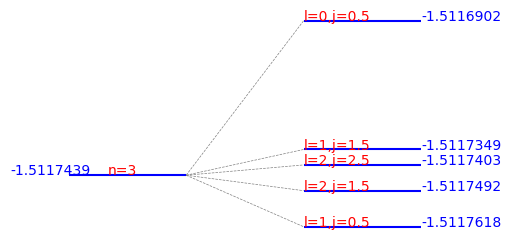

In [77]:
matplotlib.rcParams.update({'font.size':10}); 
plt.figure(figsize = (5,3), dpi = 100)
def plot_Hso(n):
    plt.hlines(bohr(Z,mu,n), 0, 0.3, color='blue')
    plt.text(-0.15,bohr(Z,mu,n),'%10.7f' % (bohr(Z,mu,n)),color='blue')
    plt.text(0.1, bohr(Z,mu,n), 'n='+str(n), color='red')
    for l in range(0, n):
        j=abs(l-s)-1
        while j<(l+s):
            j+=1
            plt.plot([0.3,0.6],[bohr(Z,mu,n),bohr(Z,mu,n)+Eso(n,l,j)], '--', color='gray', linewidth=0.5)
            plt.hlines(bohr(Z,mu,n)+Eso(n,l,j), 0.6, 0.9, color='blue')
            plt.text(0.9,bohr(Z,mu,n)+Eso(n,l,j),'%10.7f' % (bohr(Z,mu,n)+Eso(n,l,j)),color='blue')
            plt.text(0.6,bohr(Z,mu,n)+Eso(n,l,j),'l='+str(l)+',j='+str(j),color='red')
    plt.axis('off'); plt.show()
plot_Hso(3)

## Correção de Darwin
OBS. Esse físico também tem o nome Charles Darwin, mas ele é neto do Charles Darwin que propôs a teoria da evolução das espécies por seleção natural.

Consideremos que o elétron possui _extensão espacial finita_, com sua carga elétrica $-e$ distribuída em uma esfera of raio igual ao seu comprimento de onda de Compton:
\begin{equation}
R_{e^{-}}=\frac{\hbar}{mc}.
\end{equation}
Seja $\vec{r}'$ a posição de um elemento de carga $dq$ do elétron em relação ao centro de cargas, que está na posição $\vec{r}$ em relação ao próton. A verdadeira energia potencial elétrica de interação entre elétron e próton nesse caso é
\begin{equation}
\tilde{V} = \int_{e^{-}}dq(\vec{r}') \Phi(||\vec{r}+\vec{r}'||),
\end{equation}
com $\Phi(r)=ke/r$ sendo o potencial elétrico criado pelo próton na posição do elemento de carga $dq$. Vamos escrever a densidade volumétrica de carga elétrica do elétron como
\begin{equation}
\rho(\vec{r}')=-e\rho_{0}(\vec{r}'),
\end{equation}
de forma que $-e=\int_{e^{-}}d^{3}r'\rho(\vec{r}')=\int_{e^{-}}d^{3}r'(-e\rho_{0}(\vec{r}'))=-e\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}')$, e assim devemos ter $\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}')=1$. Uma forma de satisfazermos essa relação é utilizando
\begin{equation}
\rho_{0}(\vec{r}')=\begin{cases}\frac{1}{4\pi R_{e^{-}}^{3}/3}\text{, }r'<R_{e^{-}}, \\ 0\hspace{1cm}\text{, } r'>R_{e^{-}}.\end{cases}
\end{equation}
e
\begin{align}
\tilde{V} &= \int_{e^{-}}d^{3}r'\rho(\vec{r}') \Phi(||\vec{r}+\vec{r}'||) = \int_{e^{-}}d^{3}r'(-e\rho_{0}(\vec{r}')) \Phi(||\vec{r}+\vec{r}'||) \\
&= -e\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}')\Phi(||\vec{r}+\vec{r}'||).
\end{align}

Considerando o pequeno tamanho do elétron, vamos usar a expansão em série de Taylor:
\begin{align}
\Phi(||\vec{r}+\vec{r}'||) = \Phi(r) + \sum_{j=1}^{3}\left(\frac{\partial \Phi}{\partial x_{j}'}\right)_{r}x_{j}' + \frac{1}{2}\sum_{j,k=1}^{3}\left(\frac{\partial^{2} \Phi}{\partial x_{j}'\partial x_{k}'}\right)_{r}x_{j}'x_{k}'+\cdots,
\end{align}
para escrever
\begin{align}
\tilde{V} &\approx -e\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}') \Phi(r) -e\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}') \sum_{j=1}^{3}\left(\frac{\partial \Phi}{\partial x_{j}'}\right)_{r}x_{j}' -e\frac{1}{2}\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}')\sum_{j,k=1}^{3}\left(\frac{\partial^{2} \Phi}{\partial x_{j}'\partial x_{k}'}\right)_{r}x_{j}'x_{k}' \\
&=  -e\Phi(r)\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}') -e\sum_{j=1}^{3}\left(\frac{\partial \Phi}{\partial x_{j}'}\right)_{r}\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}') x_{j}' -e\frac{1}{2}\sum_{j,k=1}^{3}\left(\frac{\partial^{2} \Phi}{\partial x_{j}'\partial x_{k}'}\right)_{r}\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}')x_{j}'x_{k}' \\
&=  -e\Phi(r) +0 -e\frac{1}{2}\sum_{j,k=1}^{3}\left(\frac{\partial^{2} \Phi}{\partial x_{j}'\partial x_{k}'}\right)_{r}\delta_{j,k}\frac{1}{3}\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}')r'^{2} \\
&=  V(r) - \frac{e}{6}\nabla^{2}\Phi\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}')r'^{2} =  V(r) + \frac{R_{e^{-}}}{10}\nabla^{2}V(r) \\
&=  V(r) + \frac{\hbar^{2}}{10m^{2}c^{2}}\nabla^{2}V(r).
\end{align}

Para obter os resultados acima, assumimos que a distribuição de cargas do elétron é esfericamente simétrica e com densidade constante, como explicitado acima para $\rho_{0}(\vec{r}')$.
Além disso, usamos $r'^{2}=\sum_{j=1}^{2}x_{j}'^{2}$, $\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}') x_{j}'=0$ para $j=1,2,3$ e $\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}')r'^{2}=3R_{e^{-}}^{2}/5$.

Com isso, teremos um Hamiltoniano de perturbação devido ao termo de Darwin
\begin{align}
H_{1}^{d} &= \frac{\hbar^{2}}{10m^{2}c^{2}}\nabla^{2}V(r) = \frac{\hbar^{2}}{10m^{2}c^{2}}\nabla^{2}\left(-\frac{ke^{2}}{r}\right) = -\frac{\hbar^{2}ke^{2}}{10m^{2}c^{2}}\nabla^{2}\left(\frac{1}{r}\right) \\
& = -\frac{\hbar^{2}ke^{2}}{10m^{2}c^{2}}\left(-4\pi\delta(\vec{r})\right) = \frac{2\pi\hbar^{2}ke^{2}}{5m_{e}^{2}c^{2}}\delta(\vec{r}).
\end{align}
em que usamos o resultado $\nabla^{2}(1/r)=-4\pi\delta(\vec{r})$. Nesse caso a correção perturbativa de 1ª ordem pode ser escrita como
\begin{align}
E_{n}^{d(1)} &= \langle\psi_{n,l,m_{l}}^{(0)}|H_{1}^{d}|\psi_{n,l,m_{l}}^{(0)}\rangle = \langle\psi_{n,l,m_{l}}^{(0)}|\frac{2\pi\hbar^{2}ke^{2}}{5m^{2}c^{2}}\delta(\vec{r})|\psi_{n,l,m_{l}}^{(0)}\rangle \\
&= \frac{2\pi\hbar^{2}ke^{2}}{5m^{2}c^{2}}\langle\psi_{n,l,m_{l}}^{(0)}|\int d^{3}r'|\vec{r}'\rangle\langle\vec{r}'|\delta(\vec{r})|\psi_{n,l,m_{l}}^{(0)}\rangle \\
&= \frac{2\pi\hbar^{2}ke^{2}}{5m^{2}c^{2}}\int d^{3}r'\langle\psi_{n,l,m_{l}}^{(0)}|\vec{r}'\rangle\langle\vec{r}'|\psi_{n,l,m_{l}}^{(0)}\rangle\delta(\vec{r}) \\
& = \frac{2\pi\hbar^{2}ke^{2}}{5m^{2}c^{2}}\int d^{3}r'|\psi_{n,l,m_{l}}^{(0)}(\vec{r}')|^{2}\delta(\vec{r}) \\
& = \frac{2\pi\hbar^{2}ke^{2}}{5m^{2}c^{2}}\left|\psi_{n,l,m_{l}}^{(0)}(\vec{0})\right|^{2}.
\end{align}

As funções de onda não perturbadas de átomos hidrogenóides são
\begin{equation}
\psi_{n,l,m_{l}}(r,\theta,\phi) = \sqrt{\left(\frac{2Z}{a_{0}n}\right)^{3}\frac{(n-l-1)!}{(n+l)!2n}}e^{-Zr/a_{0}n}\left(\frac{2Zr}{a_{0}n}\right)^{l}L_{n-l-1}^{2l+1}\left(\frac{2Zr}{a_{0}n}\right)\sqrt{\frac{2l+1}{4\pi}\frac{(l-|m_{l}|)!}{(l+|m_{l}|)!}}(\sin\theta)^{|m_{l}|}\frac{\partial^{|m_{l}|}P_{l}(\cos\theta)}{\partial z^{|m_{l}|}}e^{im_{l}\phi},
\end{equation}
com $L_{j}^{k}(x)=(e^{x}x^{-k}/j!)\partial_{x^{j}}(e^{-x}x^{j+k})$ e $P_{l}(z)=(1/l!2^{l})\partial_{z^{l}}(z^{2}-1)^{l}$. O termo $\left(\frac{2Zr}{a_{0}n}\right)^{l}$ implica que 
$$\psi_{n,l>0,m_{l}}(r,\theta,\phi)=0\Rightarrow E_{n}^{d(1)}=0.$$
Para $n=1,l=0,m_{l}=0$ teremos ($Z=1$):
\begin{equation}
\psi_{1,0,0}(r=0,\theta,\phi) = \frac{1}{\sqrt{\pi}}\left(\frac{Z}{a}\right)^{3/2}e^{-Z0/a_{0}} = 1/\sqrt{\pi a^{3}}.
\end{equation}
Assim
\begin{align}
E_{n=1,l=0,m_{l}=0}^{d(1)} &= \frac{2\pi\hbar^{2}ke^{2}}{5m^{2}c^{2}}\left|\psi_{1,0,0}^{(0)}(\vec{0})\right|^{2} = \frac{2\pi\hbar^{2}ke^{2}}{5m^{2}c^{2}}\frac{1}{\pi a^{3}} = \frac{2\hbar^{2}ke^{2}}{5m^{2}c^{2}}\frac{k^{3}m^{3}e^{6}}{\hbar^{6}} \\
&= \frac{k^{4}e^{8}}{\hbar^{4}c^{4}}c^{2}m\frac{2}{5} = \alpha^{4}mc^{2}\frac{2}{5} \approx 5,79\times 10^{-4}\text{ eV}.
\end{align}
Vemos assim que a correção de Darwin é da mesma ordem de grandeza que as correções relativística e de interação spin-órbita.

In [92]:
((2*al**4*m*c**2)/5)/e

Para o código a seguir, consideremos a função de onda de átomos hidrogenóides com $l=0$ e calculada em $r=0$:
\begin{align}
\psi_{n,l=0,m_{l}=0}(r=0,\theta,\phi) & = \sqrt{\left(\frac{2Z}{a_{0}n}\right)^{3}\frac{(n-0-1)!}{(n+0)!2n}}e^{-Z(0)/a_{0}n}\left(\frac{2Zr}{a_{0}n}\right)^{0}L_{n-0-1}^{2(0)+1}\left(\frac{2Z(0)}{a_{0}n}\right)\sqrt{\frac{2(0)+1}{4\pi}\frac{(0-|0|)!}{(0+|0|)!}}(\sin\theta)^{|0|}\frac{\partial^{|0|}P_{0}(\cos\theta)}{\partial z^{|0|}}e^{i(0)\phi} \\
&  = \sqrt{\left(\frac{2Z}{a_{0}n}\right)^{3}\frac{(n-1)!}{n!2n}}(1)(1)L_{n-1}^{1}(0)\sqrt{\frac{1}{4\pi}}(1)(1)(1)
\end{align}
em que usamos $P_{0}(z)=(1/0!2^{0})\partial_{z^{0}}(z^{2}-1)^{0} = 1$ e $L_{j=n-1}^{k=1}(x)=(e^{x}x^{-1}/(n-1)!)\partial_{x^{n-1}}(e^{-x}x^{n-1+1})$.

In [131]:
def rodrigues_laguerre(j,k,x):
    if j == 0:
        return 1
    rod = exp(-x)*x**(j+k)
    for l in range(1,j+1):
        rod = diff(rod,x)
    return ((exp(x)*(x**(-k)))/(factorial(j)))*rod

In [134]:
def Ed(n):
    Z = 1
    psi = sqrt((1/(4*pi))*(((2*Z)/a0*n)**3)*(1/(2*n**2)))#*rodrigues_laguerre(n-1,1,0.00001)
    return (((2*pi*hb**2*k*e**2)/(5*m**2*c**2))*psi**2)/e
for n in range(1, 5):
    print('n=',n,', Ed=',Ed(n), ' eV')

n= 1 , Ed= 0.000579302031372046  eV
n= 2 , Ed= 0.00115860406274409  eV
n= 3 , Ed= 0.00173790609411614  eV
n= 4 , Ed= 0.00231720812548819  eV


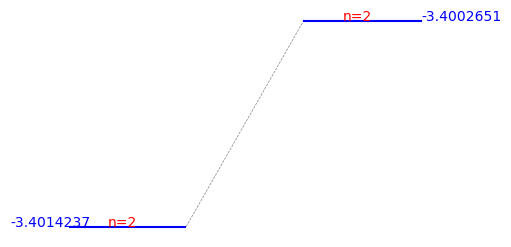

In [135]:
matplotlib.rcParams.update({'font.size':10}); 
plt.figure(figsize = (5,3), dpi = 100)
def plot_Hd(n):
    plt.hlines(bohr(Z,mu,n), 0, 0.3, color='blue')
    plt.text(-0.15,bohr(Z,mu,n),'%10.7f' % (bohr(Z,mu,n)),color='blue')
    plt.text(0.1, bohr(Z,mu,n), 'n='+str(n), color='red')
    plt.plot([0.3,0.6],[bohr(Z,mu,n),bohr(Z,mu,n)+Ed(n)], '--', color='gray', linewidth=0.5)
    plt.plot([0.6,0.9],[bohr(Z,mu,n)+Ed(n),bohr(Z,mu,n)+Ed(n)], color='blue')
    plt.text(0.9,bohr(Z,mu,n)+Ed(n),'%10.7f' % (bohr(Z,mu,n)+Ed(n)),color='blue')
    plt.text(0.7,bohr(Z,mu,n)+Ed(n),'n='+str(n),color='red')
    plt.axis('off'); plt.show()
plot_Hd(2)

## Estrutura fina
OBS. Todos esses termos de correção fina, o relativístico, o de interação spin-órbita e o de Darwin, aparecem, de forma mais precisa, como um limite da Equação de Dirac da Mecânica Quântica Relativística aplicada ao átomo de Hidrogênio. Por isso, não incluiremos "na mão" um fator devido à precessão de Thomas, que é um efeito relativístico.

Usando as fórmulas obtidas aqui, vamos somar essas três contribuições descritas acima para obter a correção de estrutura fina para o estado fundamental $(n=1,l=0,m_{l}=0,j=1/2)$ do átomo de Hidrogênio:
\begin{align}
E_{1}^{f(1)} &= E_{1}^{r(1)} + E_{1}^{so(1)} + E_{1}^{d(1)} \\ 
& = -\alpha^{4}mc^{2}\frac{1}{8(1)^{4}}\left(\frac{4(1)}{0+1/2} -3 \right) -\frac{\alpha^{4}mc^{2}}{(1)^{3}} + \alpha^{4}mc^{2}\frac{2}{5} \\
& = \alpha^{4}mc^{2}\left(-\frac{5}{8}-1+\frac{2}{5}\right) \\
& = -1,225\alpha^{4}mc^{2}.
\end{align}

Para $l>0$ a correção de Darwin é nula. Vamos adicionar as duas contribuições restantes para obter uma fórmula geral para a estrutura fina do átomo de Hidrogênio:
\begin{align}
E_{n,l>0} & \rightarrow E_{n}^{(0)} + E_{n}^{r(1)} + E_{n}^{so(1)} \\
& = -\alpha^{2}mc^{2}\frac{1}{2n^{2}} - \alpha^{4}mc^{2}\frac{1}{8n^{4}}\left(\frac{4n}{l+1/2} -3 \right) + \alpha^{4}mc^{2}\frac{1}{2n^{3}}\left(\frac{j(j+1)-l(l+1)-3/4}{l(l+1/2)(l+1)}\right) \\
& = \frac{-\alpha^{2}mc^{2}}{2n^{2}}\left(1 + \frac{\alpha^{2}}{4n^{2}}\left(\frac{4n}{l+1/2} -3 \right) - \frac{\alpha^{2}}{n}\left(\frac{j(j+1)-l(l+1)-3/4}{l(l+1/2)(l+1)}\right)\right) \\
& = \cdots
\end{align}
Notemos que $j=|l-s|,\cdots,l+s = |l-1/2|,l+1/2$, ou $1\le l=j\mp1/2$.

In [142]:
def Ef(n,l,j):
    if l == 0:
        return Erel(n,l) + Eso(n,l,j) + Ed(n)
    else:
        return Erel(n,l) + Eso(n,l,j)
s=1/2
for n in range(1, 5):
    for l in range(0,n):
        j=abs(l-s)-1
        while j<(l+s):
            j+=1
            print('n=',n,', l=',l,', j=',j,', Ef=', Ef(n,l,j), ' eV')

n= 1 , l= 0 , j= 0.5 , Ef= 0.00112239768578334  eV
n= 2 , l= 0 , j= 0.5 , Ef= 0.00119254754114480  eV
n= 2 , l= 1 , j= 0.5 , Ef= -8.67444448018038e-05  eV
n= 2 , l= 1 , j= 1.5 , Ef= 3.7714976000784327e-06  eV
n= 3 , l= 0 , j= 0.5 , Ef= 0.00174461097873850  eV
n= 3 , l= 1 , j= 0.5 , Ef= -2.9054500030233795e-05  eV
n= 3 , l= 1 , j= 1.5 , Ef= -2.2349615407872142e-06  eV
n= 3 , l= 2 , j= 1.5 , Ef= -9.386838471306303e-06  eV
n= 3 , l= 2 , j= 2.5 , Ef= -4.46992308157442e-07  eV
n= 4 , l= 0 , j= 0.5 , Ef= 0.00231932959288823  eV
n= 4 , l= 1 , j= 0.5 , Ef= -1.296452300026959e-05  eV
n= 4 , l= 1 , j= 1.5 , Ef= -1.650030200034311e-06  eV
n= 4 , l= 2 , j= 1.5 , Ef= -4.667228280097053e-06  eV
n= 4 , l= 2 , j= 2.5 , Ef= -8.957306800186261e-07  eV
n= 4 , l= 3 , j= 2.5 , Ef= -2.1888155714740864e-06  eV
n= 4 , l= 3 , j= 3.5 , Ef= -3.0306677143487324e-07  eV


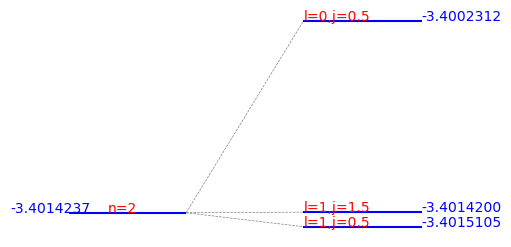

In [143]:
matplotlib.rcParams.update({'font.size':10}); 
plt.figure(figsize = (5,3), dpi = 100)
def plot_Hf(n):
    plt.hlines(bohr(Z,mu,n), 0, 0.3, color='blue')
    plt.text(-0.15,bohr(Z,mu,n),'%10.7f' % (bohr(Z,mu,n)),color='blue')
    plt.text(0.1, bohr(Z,mu,n), 'n='+str(n), color='red')
    for l in range(0, n):
        j=abs(l-s)-1
        while j<(l+s):
            j+=1
            plt.plot([0.3,0.6],[bohr(Z,mu,n),bohr(Z,mu,n)+Ef(n,l,j)], '--', color='gray', linewidth=0.5)
            plt.plot([0.6,0.9],[bohr(Z,mu,n)+Ef(n,l,j),bohr(Z,mu,n)+Ef(n,l,j)], color='blue')
            plt.text(0.9,bohr(Z,mu,n)+Ef(n,l,j),'%10.7f' % (bohr(Z,mu,n)+Ef(n,l,j)),color='blue')
            plt.text(0.6,bohr(Z,mu,n)+Ef(n,l,j),'l='+str(l)+',j='+str(j),color='red')
    plt.axis('off'); plt.show()
plot_Hf(2)

---
# Exercícios

1. Verifique que $(E_{n}^{(0)})^{2}/mc^{2}=\alpha^{4}mc^{2}/4n^{4}$.

1. Calcule os valores possíveis da correção perturbativa relativística para $n=2$.

1. Calcule os valores possíveis da correção perturbativa pela interação spin-órbita para $n=2$.

1. Verifique que $\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}') x_{j}'=0$ para $j=1,2,3$, assumindo $\rho_{0}(\vec{r}')=\rho_{0}(r')$ constante.

1. Verifique que $\int_{e^{-}}d^{3}r'\rho_{0}(\vec{r}')r'^{2}=3R_{e^{-}}^{2}/5$, assumindo $\rho_{0}(\vec{r}')=\rho_{0}(r')$ constante.

1. Verifique que $\nabla^{2}(1/r)=-4\pi\delta(\vec{r})$.

1. Calcule os valores possíveis da correção perturbativa pelo termo de Darwin para $n=2$.

1. Calcule os possíveis valores de energia do átomo de Hidrogênio para $n=2$, incluindo as correções relativística, de interação spin-órbita e de Darwin.